# PyTorch Workflow
An example PyTorch end-to-end workflow

In [1]:
what_we_are_covering = {
    1: "data (prepare and load)", 
    2: "build model", 
    3: "fitting the model to data (training)", 
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "pytting it all together"
}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'pytting it all together'}

In [2]:
import torch
from torch import nn # nn contains all PyTorch building blocks for neural networks computational graph
import matplotlib.pyplot as plt

torch.__version__

'2.2.2+cpu'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning.
* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation: Inputs (data of any kinds) -> Numerical encoding
2. Build a model to learn patterns in that numberical representation: Learns representation (patterns/features/weights) -> Representation output

Creating known data usng the linear regression formula

Use a linear regression formula to make a straight line with kown **parameters**

Y = a + bX

In [3]:
# Create known parameters
bias = 0.3 #a
weight = 0.7 #b

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = bias * (X + weight)

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2100],
         [0.2160],
         [0.2220],
         [0.2280],
         [0.2340],
         [0.2400],
         [0.2460],
         [0.2520],
         [0.2580],
         [0.2640]]),
 50,
 50)

### Splitting data into training and test sets

Three datasets
1. Training Set/Split - model learns patterns
2. Validation Set/Split - tune model and retrain to learn patterns
3. Test Set/Split - see if the trained model can accurately predict unseen material

Generalisation - the ability for a marhine leaarning model to perform well on data it hasn't seen before

In [110]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train, y_train, X_test, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.2100],
         [0.2160],
         [0.2220],
         [0.2280],
         [0.2340],
         [0.2400],
         [0.2460],
         [0.2520],
         [0.2580],
         [0.2640],
         [0.2700],
         [0.2760],
         [

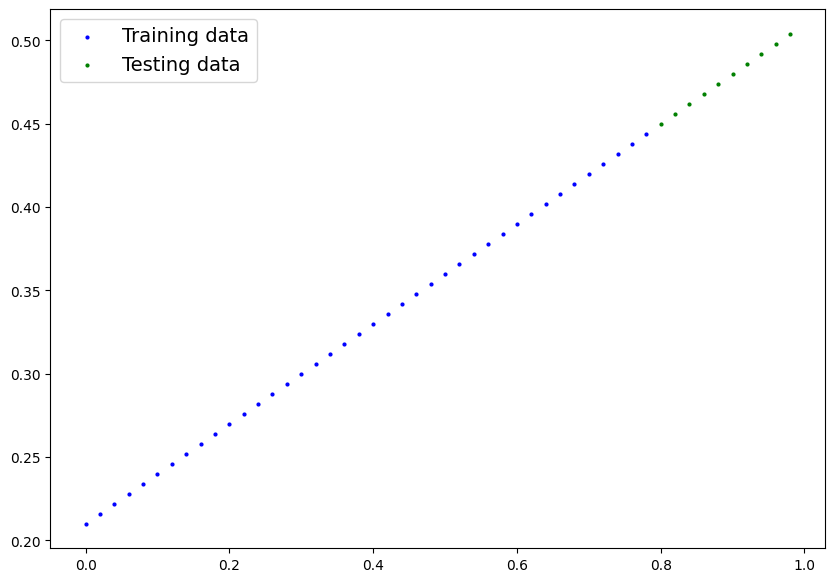

In [111]:
def plot_predictions(
    train_data=X_train, 
    train_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    predictions=None):
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size":14})


plot_predictions()

## 2. Build Model

What model does
* Start with random values (weight and bias)
* Look at our training data and adjust the random values to better represent (or get closer to) the ideal values (weight and bias values we used to create the data)

Two main algorithms:
1. Gradient descent
2. Backpropagation

In [126]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # Base class for all neural network models
    def __init__(self):
        super().__init__()
        # Parameter - a kind of Tensore that is to be considered a module parameter

        #random weights and bias created
        self.weights = nn.Parameter(torch.randn(
            1, #random weight
            requires_grad=True, # parameter can be updata via gradient descent
            dtype=torch.float
        ))
        self.bias =  nn.Parameter(torch.randn(
            1, 
            requires_grad=True, # requires gradient
            dtype=torch.float
        ))

    #machine learning uses forward for training and uses random weights and bias
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weights * x + self.bias # linear regression formula
                                
    

In [127]:
#torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([1.0752], requires_grad=True),
 Parameter containing:
 tensor([0.0811], requires_grad=True)]

In [128]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.0752])), ('bias', tensor([0.0811]))])

### Making predictions using `torch.inference_mode()`

Check model's prediction using y_test based on X_test

In [129]:
# Make predictions with model
with torch.inference_mode(): #inference mode turns off gradiant descent tracking
    y_preds = model_0(X_test)

#plot_predictions(predictions=y_preds)
y_preds

tensor([[0.9413],
        [0.9628],
        [0.9843],
        [1.0058],
        [1.0273],
        [1.0488],
        [1.0703],
        [1.0918],
        [1.1133],
        [1.1348]])

In [130]:
y_preds = model_0(X_test)

y_preds

tensor([[0.9413],
        [0.9628],
        [0.9843],
        [1.0058],
        [1.0273],
        [1.0488],
        [1.0703],
        [1.0918],
        [1.1133],
        [1.1348]], grad_fn=<AddBackward0>)

## 3. Train model

Purpose of training is for model to move from *unknown* parametersto *known* parameters.
From poor representation to better representation.


Measure how poor models predictions are to use loss functions/cost function/criterion

Loss function: measure how wrong the model's prediction is
Optimiser: takes into account the loss of a model and adjusts the model's paremeters to improve the loss function

PyTorch need Training loop and Testing loop

In [131]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.0752], requires_grad=True),
 Parameter containing:
 tensor([0.0811], requires_grad=True)]

In [132]:
# Setup loss function
loss_fn = nn.L1Loss() #measure how wrong the model is

# setup optimiser (stochastic gradient descent)
# lr = learning rate
optimiser = torch.optim.SGD(params=model_0.parameters(), lr=0.0001) #communicates with loss function and changes parameters in an attempt to improve accuracy

### Building a training (and testing) loop in PyTorch

Things needed in a training loop
0. Loop through the data
1. Forward pass (this involves data moving through mour model's `forward()` functions) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimiser zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimiser step

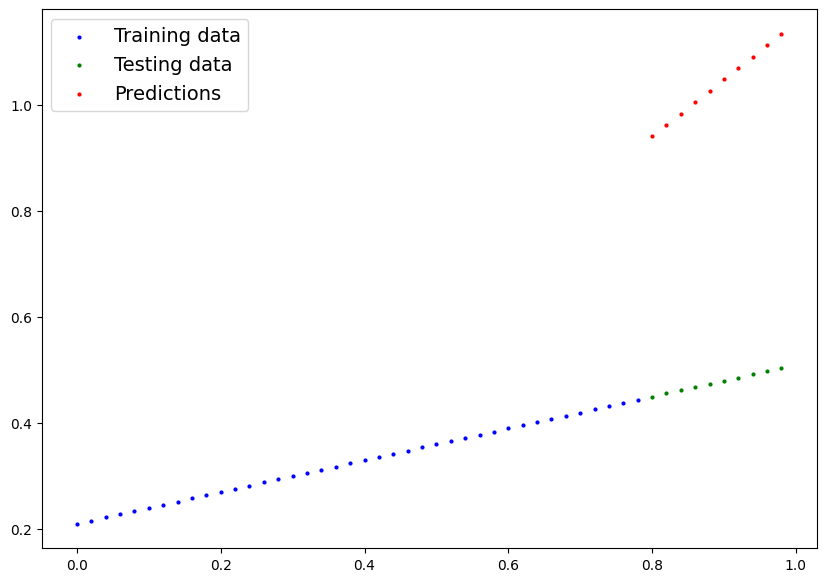

In [133]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
    plot_predictions(predictions=y_preds_new)

In [134]:
# An epoch is one loop throguh the data
epochs = 50000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
#0 loop through data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() #sets all parameters that require gradients to require gradients

    # 1. Forward propagation
    y_pred = model_0(X_train)

    # 2. Calculate loss (Mean Absolute Error)
    loss = loss_fn(y_pred, y_train) #param1 - prediction/input param2 - train/target
    # 3. Optimiser zero grad
    optimiser.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step through optimiser (perform gradient descent)
    optimiser.step() # by default, changes will accumulate through the loop, so have to zero them in step 3

    ### Testing
    model_0.eval() #turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking which is only needed for training
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 1000 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"{epoch} | {loss} | {test_loss}")


0 | 0.2035311460494995 | 0.5609552264213562
1000 | 0.16995388269424438 | 0.48412901163101196
2000 | 0.15102875232696533 | 0.4262520670890808
3000 | 0.13992826640605927 | 0.3829672634601593
4000 | 0.1327294558286667 | 0.35005730390548706
5000 | 0.12767693400382996 | 0.3255494236946106
6000 | 0.1236715093255043 | 0.3077252507209778
7000 | 0.1198759526014328 | 0.2926766574382782
8000 | 0.11638589203357697 | 0.281655490398407
9000 | 0.11289580911397934 | 0.2706342935562134
10000 | 0.10940574109554291 | 0.2596130669116974
11000 | 0.1059156209230423 | 0.2485928237438202
12000 | 0.10246223211288452 | 0.2395780384540558
13000 | 0.0990268811583519 | 0.23154714703559875
14000 | 0.0955914855003357 | 0.2235163152217865
15000 | 0.09215612709522247 | 0.21548199653625488
16000 | 0.08872073143720627 | 0.20745117962360382
17000 | 0.08528541773557663 | 0.19941680133342743
18000 | 0.08185005187988281 | 0.1913849413394928
19000 | 0.07841472327709198 | 0.1833496391773224
20000 | 0.07497940957546234 | 0.175

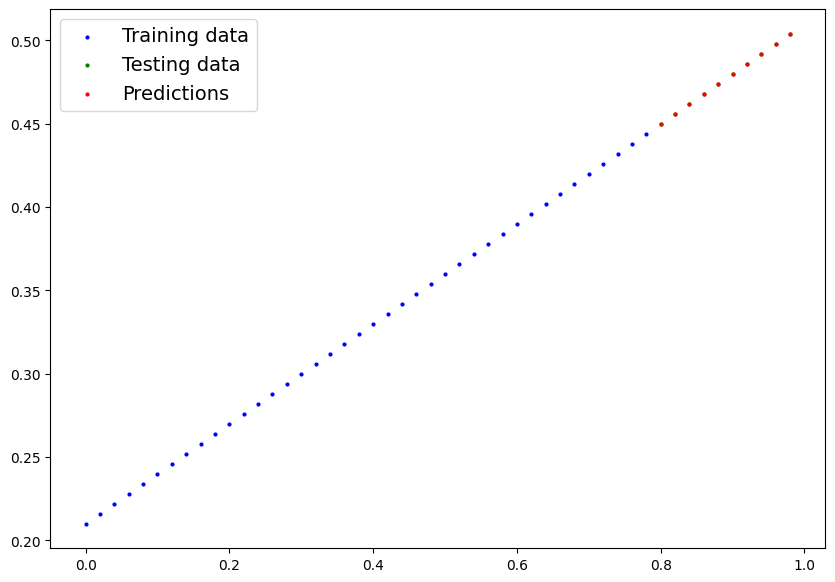

In [135]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
    plot_predictions(predictions=y_preds_new)

In [136]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3000])), ('bias', tensor([0.2099]))])

In [137]:
weight, bias

(0.7, 0.3)

In [138]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([2.03531146e-01, 1.69953883e-01, 1.51028752e-01, 1.39928266e-01,
       1.32729456e-01, 1.27676934e-01, 1.23671509e-01, 1.19875953e-01,
       1.16385892e-01, 1.12895809e-01, 1.09405741e-01, 1.05915621e-01,
       1.02462232e-01, 9.90268812e-02, 9.55914855e-02, 9.21561271e-02,
       8.87207314e-02, 8.52854177e-02, 8.18500519e-02, 7.84147233e-02,
       7.49794096e-02, 7.15440214e-02, 6.81086779e-02, 6.46733195e-02,
       6.12380318e-02, 5.78026660e-02, 5.43673038e-02, 5.09320199e-02,
       4.74966615e-02, 4.40612957e-02, 4.06260118e-02, 3.71903144e-02,
       3.37546840e-02, 3.03190742e-02, 2.68833637e-02, 2.34477352e-02,
       2.00120620e-02, 1.65764578e-02, 1.31407855e-02, 9.70516168e-03,
       6.26951177e-03, 2.83383578e-03, 4.50044863e-05, 4.50044863e-05,
       4.50044863e-05, 4.50044863e-05, 4.50044863e-05, 4.50044863e-05,
       4.50044863e-05, 4.50044863e-05], dtype=float32)

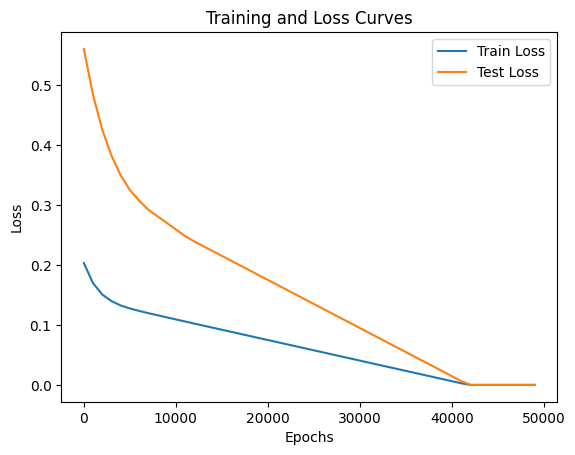

In [139]:
import numpy as np

# plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Test Loss")
plt.title("Training and Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

Three main methods for saving and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python pickle format
2. `torch.load()` - allows you to load a save PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

In [146]:
from pathlib import Path

#1 create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

test_model = LinearRegressionModel()
test_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
test_model.state_dict()

OrderedDict([('weights', tensor([0.3000])), ('bias', tensor([0.2099]))])

# 6. Putting it all together

In [149]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [150]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [171]:
weight = 0.4
bias = 0.6

start = 0
end = 1
step = 0.03

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [175]:
train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
#plot_predictions(X_train, y_train, X_test, y_test)

In [176]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        #uses linear regression formula. linear layer/ linear transform
        self.linear_layer = nn.Linear(
                                        in_features=1, #features in
                                        out_features=1 #features out
                                     )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [177]:
loss_fn = nn.L1Loss() # MAE
optimiser = torch.optim.SGD(
    params=model_1.parameters(), 
    lr=0.001
)

epochs = 2000

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)
    
    loss = loss_fn(y_pred, y_train)

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

    
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 500 == 0:
        print(f"{epoch} | {loss} | {test_loss}")

0 | 0.3721778988838196 | 0.5567415952682495
500 | 0.040193505585193634 | 0.099981389939785
1000 | 0.0224531851708889 | 0.05288585647940636
1500 | 0.004880816675722599 | 0.01139347068965435


In [178]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4004]])),
             ('linear_layer.bias', tensor([0.5995]))])